### The feature engineering for try 101
the result was around 66%

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
trainData = pd.read_csv('data/train.csv')
testData = pd.read_csv('data/test.csv')
trainData.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Title

In [4]:
trainData['Title'] = trainData['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
testData['Title'] = trainData['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [5]:
# Let's group common titles together
titleGroups = {
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master',
    'Don': 'Royalty', 'Rev' : 'Officer', 'Dr' : 'Officer', 'Mme': 'Mrs',
    'Ms': 'Miss', 'Major': 'Officer', 'Lady': 'Mrs', 'Sir': 'Royalty', 
    'Mlle': 'Miss', 'Col': 'Officer', 'Capt': 'Master', 
    'the Countess': 'Mrs','Jonkheer': 'Royalty'
}

trainData['Title'] = trainData['Title'].map(titleGroups)
trainData['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

<Axes: xlabel='Title', ylabel='Survived'>

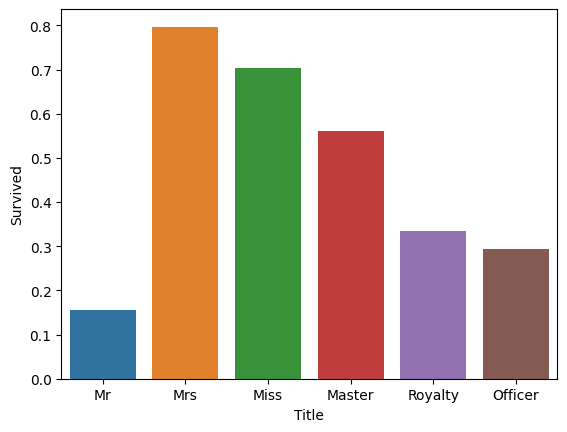

In [6]:
# how the new feature survive
sns.barplot(data=trainData, x='Title', y='Survived', errorbar=None)

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>It's the same thing as gender but with one extra info that being 'Mr' means a bad survival rate<p>
</div>

## Family Size

In [7]:
trainData['Family_size'] = trainData['SibSp'] + trainData['Parch'] + 1
testData['Family_size'] = trainData['SibSp'] + trainData['Parch'] + 1
trainData['Family_size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

<Axes: xlabel='Family_size', ylabel='Survived'>

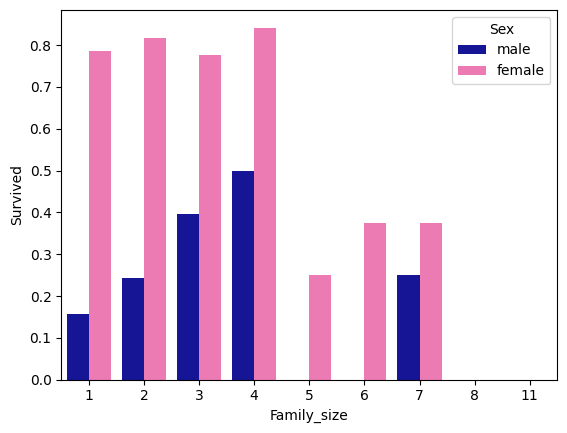

In [8]:
sns.barplot(data=trainData, x='Family_size', y='Survived',hue="Sex", palette=["#00a", "#ff68b4"], errorbar=None)

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>Families consist of 2, 3, and 4 have a higher rate while 8, 11 had all gone. Also I can't tell if being alone good or bad and I think it's something in the middle<p>
<p style="color: #c40000;">I don't know why 7-size families have this rate</p>
</div>

## Fare

In [9]:
trainData['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [10]:
bins = [0, 10, 20, 30, np.inf]
labels = ['low', 'medium', 'high', 'expensive']

# I need to turn Fare to numeric
trainData['Fare'] = pd.to_numeric(trainData['Fare'])

# Bucket fare data
trainData['Fare_lvl'] = pd.cut(trainData['Fare'], bins=bins, labels=labels)


In [11]:
bins = [0, 10, 20, 30, np.inf]
labels = ['low', 'medium', 'high', 'expensive']

# I need to turn Fare to numeric
testData['Fare'] = pd.to_numeric(testData['Fare'])

# Bucket fare data
testData['Fare_lvl'] = pd.cut(testData['Fare'], bins=bins, labels=labels)

In [12]:
testData['Fare_lvl'].value_counts()

Fare_lvl
low          153
expensive    109
medium        82
high          71
Name: count, dtype: int64

<Axes: xlabel='Fare', ylabel='Survived'>

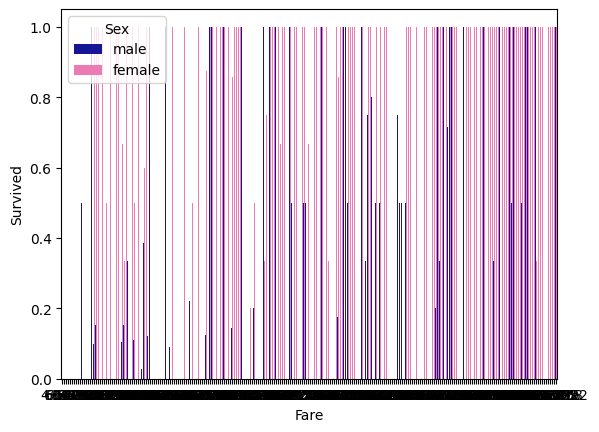

In [13]:
sns.barplot(data=trainData, x="Fare", y="Survived", hue="Sex", palette=["#00a", "#ff68b4"], errorbar=None)

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>If you paid more, then you have a higher survival rate<p>
</div>

## Age

In [14]:
# Now let's bucket the age
bins = [0, 18, 65, np.inf]
labels = ['Child', 'Adult', 'Elderly']


trainData['Age_group'] = pd.cut(trainData['Age'], bins=bins, labels=labels)

In [15]:
# do the same with test data
testData['Age_group'] = pd.cut(testData['Age'], bins=bins, labels=labels)

In [16]:
trainData['Age_group'].value_counts()

Age_group
Adult      567
Child      139
Elderly      8
Name: count, dtype: int64

<Axes: xlabel='Age_group', ylabel='Survived'>

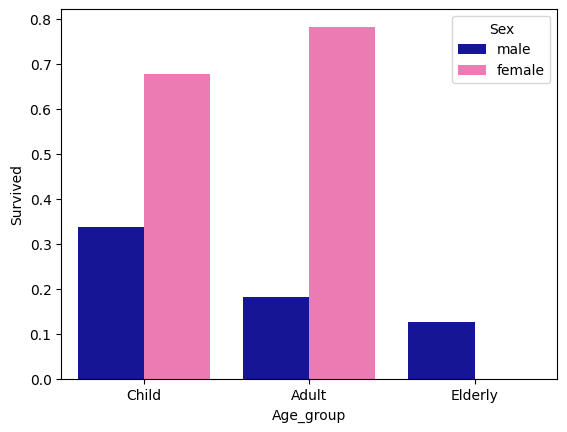

In [17]:
sns.barplot(data=trainData, x='Age_group', y='Survived', hue='Sex', palette=["#00a", "#ff68b4"], errorbar=None)

In [18]:
# I want to see the numbers
trainData['Age_group'].groupby(trainData['Survived']).value_counts()

Survived  Age_group
0         Adult        348
          Child         69
          Elderly        7
1         Adult        219
          Child         70
          Elderly        1
Name: count, dtype: int64

In [19]:
# what is the gender of the elderlies?
trainData['Age_group'].groupby(trainData['Sex']).value_counts()

Sex     Age_group
female  Adult        193
        Child         68
        Elderly        0
male    Adult        374
        Child         71
        Elderly        8
Name: count, dtype: int64

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>Same as the Captian famous word "Women and Children"<p>
<p>There is an old man who survived and from the momery he was in the class 1</p>
</div>

## Cabin

In [20]:
# has or not
trainData['Has_Cabin'] = trainData['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [21]:
# doing the same with test data
testData['Has_Cabin'] = testData['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [22]:
trainData['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

<Axes: xlabel='Has_Cabin', ylabel='Survived'>

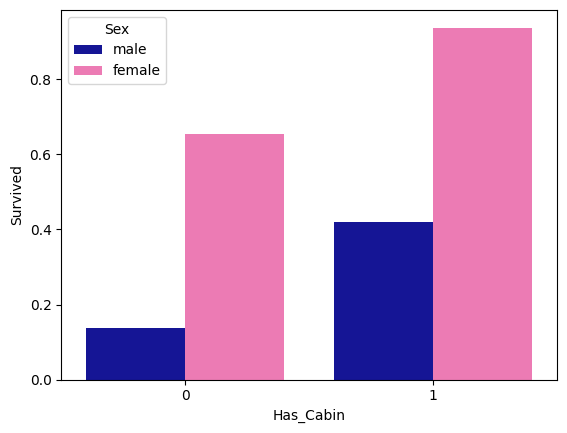

In [23]:
sns.barplot(data=trainData, x="Has_Cabin", y="Survived", hue='Sex', palette=["#00a", "#ff68b4"], errorbar=None)

<div style="background: #e3eefc; padding: 24px 12px; color: #00a; font-weight: bold; margin: 4px 80px 4px 4px; border-radius: 4px;">
<p>Having a Cabin is a game changer<p>
</div>

## Droping

In [25]:
trainData = trainData.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Has_Cabin'], axis=1)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          714 non-null    float64 
 4   Embarked     889 non-null    object  
 5   Title        891 non-null    object  
 6   Family_size  891 non-null    int64   
 7   Fare_lvl     876 non-null    category
 8   Age_group    714 non-null    category
dtypes: category(2), float64(1), int64(3), object(3)
memory usage: 50.9+ KB


In [26]:
testData = testData.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Has_Cabin'], axis=1)
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    int64   
 1   Sex          418 non-null    object  
 2   Age          332 non-null    float64 
 3   Embarked     418 non-null    object  
 4   Title        418 non-null    object  
 5   Family_size  418 non-null    int64   
 6   Fare_lvl     415 non-null    category
 7   Age_group    332 non-null    category
dtypes: category(2), float64(1), int64(2), object(3)
memory usage: 20.9+ KB


## Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

trainData['Sex'] = LabelEncoder().fit_transform(trainData['Sex'])

trainData['Embarked'] = LabelEncoder().fit_transform(trainData['Embarked']) 

trainData['Title'] = LabelEncoder().fit_transform(trainData['Title'])

trainData['Age_group'] = LabelEncoder().fit_transform(trainData['Age_group'])

trainData['Fare_lvl'] = trainData['Fare_lvl'].astype('category').cat.codes

trainData.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Family_size,Fare_lvl,Age_group
0,0,3,1,22.0,2,2,2,0,0
1,1,1,0,38.0,0,3,2,3,0
2,1,3,0,26.0,2,1,1,0,0
3,1,1,0,35.0,2,3,2,3,0
4,0,3,1,35.0,2,2,1,0,0


In [28]:
# same with the test data
testData['Sex'] = LabelEncoder().fit_transform(testData['Sex'])

testData['Embarked'] = LabelEncoder().fit_transform(testData['Embarked']) 

testData['Title'] = LabelEncoder().fit_transform(testData['Title'])

testData['Age_group'] = LabelEncoder().fit_transform(testData['Age_group'])

testData['Fare_lvl'] = testData['Fare_lvl'].astype('category').cat.codes

testData.head()

,Pclass,Sex,Age,Embarked,Title,Family_size,Fare_lvl,Age_group
0,3,1,34.5,1,5,2,0,0
1,3,0,47.0,2,6,2,0,0
2,2,1,62.0,1,3,1,0,0
3,3,1,27.0,2,6,2,0,0
4,3,0,22.0,2,5,1,1,0


## Complete the age

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(trainData[['Age','Pclass','Sex']])  
trainData[['Age','Pclass','Sex']] = imputer.transform(trainData[['Age','Pclass','Sex']])
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    float64
 2   Sex          891 non-null    float64
 3   Age          891 non-null    float64
 4   Embarked     891 non-null    int32  
 5   Title        891 non-null    int32  
 6   Family_size  891 non-null    int64  
 7   Fare_lvl     891 non-null    int8   
 8   Age_group    891 non-null    int32  
dtypes: float64(3), int32(3), int64(2), int8(1)
memory usage: 46.2 KB


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(testData[['Age','Pclass','Sex']])  
testData[['Age','Pclass','Sex']] = imputer.transform(testData[['Age','Pclass','Sex']])
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    float64
 1   Sex          418 non-null    float64
 2   Age          418 non-null    float64
 3   Embarked     418 non-null    int32  
 4   Title        418 non-null    int32  
 5   Family_size  418 non-null    int64  
 6   Fare_lvl     418 non-null    int8   
 7   Age_group    418 non-null    int32  
dtypes: float64(3), int32(3), int64(1), int8(1)
memory usage: 18.5 KB


In [37]:
trainData['Age_group'] = trainData['Age'].apply(lambda x: 'Child' if x<18 else 'Adult' if x<60 else 'Senior')
testData['Age_group'] = testData['Age'].apply(lambda x: 'Child' if x<18 else 'Adult' if x<60 else 'Senior')

In [38]:
le = LabelEncoder()
trainData['Age_group'] = le.fit_transform(trainData['Age_group'])
testData['Age_group'] = le.fit_transform(testData['Age_group'])

## Save the files

In [ ]:
trainData.to_csv('data/train101.csv', index=False)
testData.to_csv('data/test101.csv', index=False)